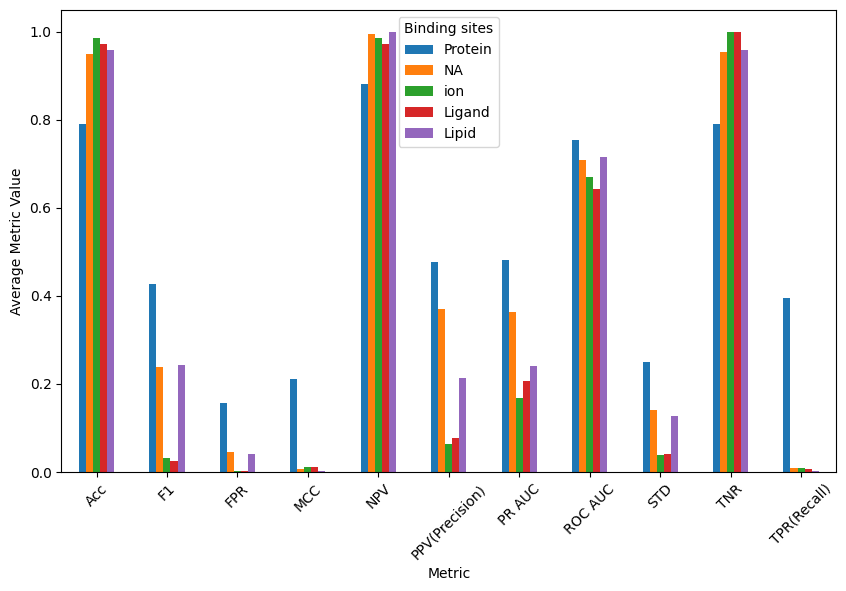

In [37]:
def plot(metric_csv='eval_result/metrics_test.csv'):
    import pandas as pd
    import matplotlib.pyplot as plt
    # read a csv to be a multi-level index dataframe
    df = pd.read_csv(metric_csv)

    # Calculate average values for each metric and molecule
    average_values = df.groupby('Metric')[['Protein', 'NA', 'ion', 'Ligand', 'Lipid']].mean()

    # Plotting
    ax = average_values.plot(kind='bar', figsize=(10, 6))
    ax.set_ylabel('Average Metric Value')
    ax.set_xlabel('Metric')
    plt.xticks(rotation=45)
    plt.legend(title='Binding sites')
    plt.savefig('eval_result/average_metric.png')
    plt.show()
    return df
df = plot('eval_result/metircs_test.csv')

In [38]:
df[df['PDBID'] == 'BS/8BSQ/1/A:0']

,PDBID,Metric,Protein,NA,ion,Ligand,Lipid
0,BS/8BSQ/1/A:0,Acc,0.878261,0.985507,1.000000,0.904348,0.988406
1,BS/8BSQ/1/A:0,PPV(Precision),NaN,NaN,NaN,0.000000,NaN
2,BS/8BSQ/1/A:0,NPV,1.000000,1.000000,1.000000,0.904348,1.000000
3,BS/8BSQ/1/A:0,TPR(Recall),0.000000,0.000000,0.000000,0.000000,0.000000
4,BS/8BSQ/1/A:0,TNR,0.878261,0.985507,1.000000,1.000000,0.988406
5,BS/8BSQ/1/A:0,MCC,0.000000,0.000000,0.000000,0.000000,0.000000
6,BS/8BSQ/1/A:0,ROC AUC,NaN,NaN,NaN,0.721834,NaN
7,BS/8BSQ/1/A:0,STD,0.227918,0.101613,0.057752,0.048324,0.094936
8,BS/8BSQ/1/A:0,PR AUC,NaN,NaN,NaN,0.193749,NaN
9,BS/8BSQ/1/A:0,F1,NaN,NaN,NaN,0.000000,NaN


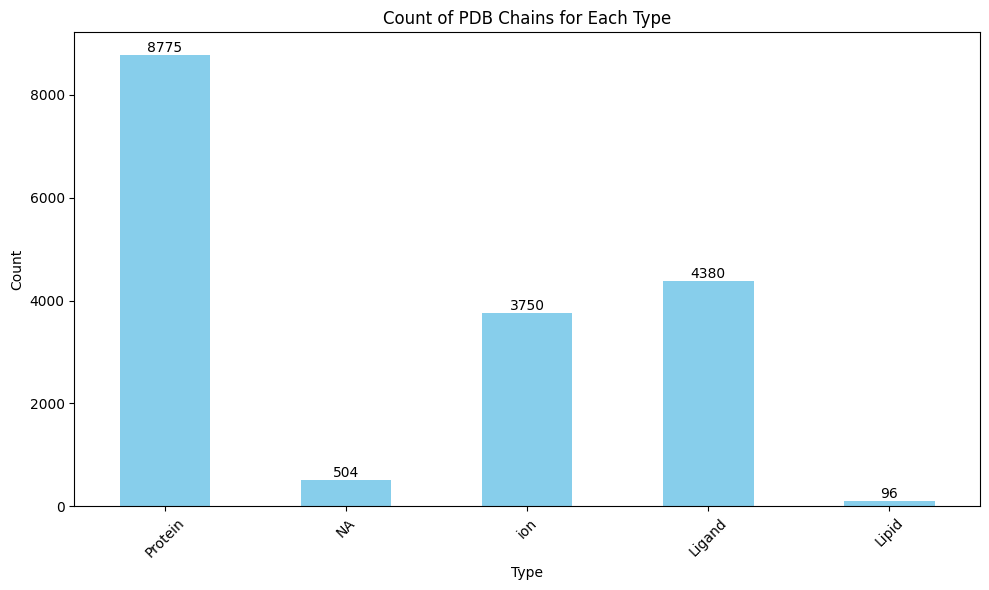

In [47]:
import matplotlib.pyplot as plt

def visualize_entry_counts(df):
    # Calculate the count of True values for each column
    counts = df.iloc[:, 1:].sum()

    # Create a bar chart to visualize the counts
    plt.figure(figsize=(10, 6))
    ax = counts.plot(kind='bar', color='skyblue')
    plt.title('Count of PDB Chains for Each Type')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Add annotations (count values) to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()

    # Display the chart
    plt.show()


import pandas as pd
cols = [i for i in df.columns.tolist() if i != 'Metric']
binding_df = pd.DataFrame(columns=cols)
for pdbid, g_df in df.groupby('PDBID'):
    binding_type = ~(g_df.isna().any(axis=0))
    # append PDBID and binding type to binding_df
    binding_type['PDBID'] = pdbid
    binding_type = pd.DataFrame(binding_type).T.drop(['Metric'], axis=1)
    binding_df = pd.concat([binding_df, binding_type])
    
    
visualize_entry_counts(binding_df)


In [ ]:
binding_df